### Modelling Chicago Crime Data with District as output variable: 

In [1]:
import pandas as pd
import seaborn as sbs
import copy
import os
import warnings
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 30)

In [2]:
#CSS Styling for better view of the notebook

from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-style:italic;
font-size:1.4em;
line-height:1.4em;
padding-left:0em;
padding-right:0em;
}
</style>
""")

In [3]:
#Setting default parameters of the plot 

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
FIGURE_SIZE = (8,6)

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize = FIGURE_SIZE)  # controls figuresize 

### Training, Validation and Test data are prepared during the data preprocessing section and are used in modelling the data.

In [4]:
#Reading the data.....

training_df = pd.read_csv("training.csv")

validate_df = pd.read_csv("validate.csv")

testing_df = pd.read_csv("testing.csv")

### Data Exploration:

In [5]:
training_df.head()

,ID,Case Number,Date,Block,IUCR,...,Domestic_Codes,Year,Month,Week,Hour
0,11186430,JA560886,2017-12-23 11:45:00,049XX N WINTHROP AVE,0820,...,0,2017,12,51,11
1,9296242,HW440886,2013-09-06 14:00:00,032XX N MILWAUKEE AVE,0486,...,0,2013,9,36,14
2,11278627,JB215264,2018-04-07 18:34:00,0000X W 111TH ST,0460,...,0,2018,4,14,18
3,9734456,HX384483,2014-08-07 23:30:00,080XX S ESSEX AVE,1220,...,0,2014,8,32,23
4,8899755,HV573828,2012-11-23 15:00:00,019XX W SCHILLER ST,1360,...,0,2012,11,47,15


In [6]:
training_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'Latitude', 'Longitude',
       'Primary_Type_Codes', 'Description_Codes', 'Location_Desctiption_Codes',
       'Arrest_Codes', 'Domestic_Codes', 'Year', 'Month', 'Week', 'Hour'],
      dtype='object')

In [7]:
#checking the dtypes of each column in the datadrame

print(training_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993637 entries, 0 to 1993636
Data columns (total 25 columns):
ID                            int64
Case Number                   object
Date                          object
Block                         object
IUCR                          object
Primary Type                  object
Description                   object
Location Description          object
Arrest                        bool
Domestic                      bool
Beat                          int64
District                      int64
Ward                          int64
Community Area                int64
Latitude                      float64
Longitude                     float64
Primary_Type_Codes            int64
Description_Codes             int64
Location_Desctiption_Codes    int64
Arrest_Codes                  int64
Domestic_Codes                int64
Year                          int64
Month                         int64
Week                          int64
Hour          

### Exploring Output variable District:

In [8]:
'''
District Names: 

1 : 'Central',
2 : 'WentWorth',
3 : 'Grand Crossing',
4 : 'South Chicago',
5 : 'Calumet',
6 : 'Gresham',
7 : 'Englewood',
8 : 'Chicago Lawn',
9 : 'Deering',
10 : 'Ogden',
11 : 'Harrison',
12 : 'Near West',
14 : 'Shakespeare',
15 : 'Austin',
16 : 'Jefferson Park',
17 : 'Albany Park',
18 : 'Near North',
19 : 'Town Hall',
20 : 'Lincon',
22 : 'Morgan Park',
23 : 'Rogers Park',
25 : 'Grant Central'
''';

In [9]:
#Adding Distict name as a column to our dataframe:

def add_district_name(df):
    
    if df['District'] == 1 :
        return 'Central'
    if df['District'] == 2 :
        return 'WentWorth'
    if df['District'] == 3 :
        return 'Grand Crossing'
    if df['District'] == 4 :
        return 'South Chicago'
    if df['District'] == 5 :
        return 'Calumet'
    if df['District'] == 6 :
        return 'Gresham'
    if df['District'] == 7 :
        return 'Englewood'
    if df['District'] == 8 :
        return 'Chicago Lawn'
    if df['District'] == 9 :
        return 'Deering'
    if df['District'] == 10 :
        return 'Ogden'
    if df['District'] == 11 :
        return 'Harrison'
    if df['District'] == 12 :
        return 'Near West'
    if df['District'] == 14 :
        return 'Shakespeare'
    if df['District'] == 15 :
        return 'Austin'
    if df['District'] == 16 :
        return 'Jefferson Park'
    if df['District'] == 17 :
        return 'Albany Park'
    if df['District'] == 18 :
        return 'Near North'
    if df['District'] == 19 :
        return 'Town Hall'
    if df['District'] == 20 :
        return 'Lincon'
    if df['District'] == 22 :
        return 'Morgan Park'
    if df['District'] == 23 :
        return 'Rogers Park'
    if df['District'] == 25 :
        return 'Grant Central'
    return 'Other'

In [10]:
#Adding District_Name for all the three datasets

training_df['District_Name'] = training_df.apply (lambda df: add_district_name(df), axis=1)

validate_df['District_Name'] = validate_df.apply (lambda df: add_district_name(df), axis=1)

testing_df['District_Name'] = testing_df.apply (lambda df: add_district_name(df), axis=1)

In [11]:
district_count = training_df['District'].value_counts()

In [12]:
district_count

11    136402
8     131671
6     120411
7     114896
4     114322
25    112291
3     100694
12     95985
9      95704
18     93187
10     90854
19     89620
5      89245
1      87993
15     84900
2      84550
14     73662
16     65626
22     64555
17     57532
24     56361
20     33163
31        13
Name: District, dtype: int64

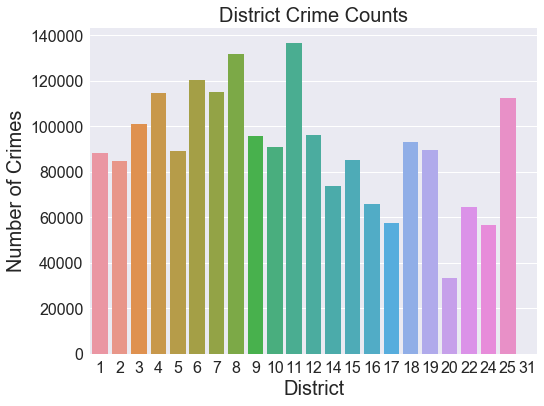

In [13]:
#Plotting the frequency of crimes with respect to districts

district_crime_plot = sbs.barplot(district_count.index, district_count.values)

plt.title("District Crime Counts", fontsize = 20)

plt.ylabel("Number of Crimes",fontsize = 20)

plt.xlabel("District", fontsize = 20)

plt.show()

In [14]:
m = folium.Map([41.881832, -87.623177], tiles='stamentoner', zoom_start=10)

data = training_df.loc[:, ['Latitude','Longitude']]

HeatMap(data).add_to(m)

m.save('Heatmap.html')

In [15]:
from IPython.display import IFrame

IFrame(src='./Heatmap.html', width=700, height=600)

In [16]:
m = folium.Map(location=[41.881832, -87.623177])

HeatMap(data=training_df[['Latitude', 'Longitude']].groupby(training_df['District']).
        sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m)

m.save('district.html')

In [17]:
from IPython.display import IFrame

IFrame(src='./district.html', width=700, height=600)

In [18]:
total_crime_data = pd.read_csv("crimes2010To2019.csv")


base_map = folium.Map(location=[41.881832, -87.623177])

In [19]:
Location_Data = total_crime_data.groupby(['Location']).first()

In [20]:
key_Loc_Data = Location_Data.loc[:, ['Location Description', 'District','Latitude','Longitude']]

In [21]:
key_Loc_Data['freq'] = key_Loc_Data.groupby('District')['District'].transform('count')

In [22]:
heat_Data = key_Loc_Data.loc[:,['freq','Latitude','Longitude']]

In [23]:
m = folium.Map(location=[41.881832, -87.623177])

HeatMap(data=heat_Data, radius=8, max_zoom=13).add_to(m)

m.save('district.html')

### Converting data type of the columns to format suitable for modelling:

In [24]:
#Converting some numerical columns to categorical as variables are categorical in nature

training_df['Beat'] = training_df['Beat'].astype('category')

training_df['District'] = training_df['District'].astype('category')

training_df['Ward'] = training_df['Ward'].astype('category')

training_df['Community Area'] = training_df['Community Area'].astype('category')

training_df["Year"] = training_df["Year"].astype("category")

training_df["Month"] = training_df["Month"].astype("category")

training_df["Week"] = training_df["Week"].astype("category")

training_df["Hour"] = training_df["Hour"].astype("category")

Converting the data for validation and test datasets:

In [25]:
#Validation data:

validate_df['Beat'] = validate_df['Beat'].astype('category')

validate_df['District'] = validate_df['District'].astype('category')

validate_df['Ward'] = validate_df['Ward'].astype('category')

validate_df['Community Area'] = validate_df['Community Area'].astype('category')

validate_df["Year"] = validate_df["Year"].astype("category")

validate_df["Month"] = validate_df["Month"].astype("category")

validate_df["Week"] = validate_df["Week"].astype("category")

validate_df["Hour"] = validate_df["Hour"].astype("category")


#Testing data:

testing_df['Beat'] = testing_df['Beat'].astype('category')

testing_df['District'] = testing_df['District'].astype('category')

testing_df['Ward'] = testing_df['Ward'].astype('category')

testing_df['Community Area'] = testing_df['Community Area'].astype('category')

testing_df["Year"] = testing_df["Year"].astype("category")

testing_df["Month"] = testing_df["Month"].astype("category")

testing_df["Week"] = testing_df["Week"].astype("category")

testing_df["Hour"] = testing_df["Hour"].astype("category")

We have the data converted and ready for variables like Primary_type, Description, Location_Description, Arrest and Domestic. The converted codes will be used for modelling purposes.


### Modelling:

In [26]:
#Dividing the columns to create Independednt and Predictor variables

X_train = training_df.loc[:,['Primary_Type_Codes','Location_Desctiption_Codes', 'Arrest_Codes', 'Domestic_Codes', 'Beat',
                             'Ward', 'Community Area', 'Latitude', 'Longitude']]

y_train = training_df.loc[:,'District']

X_validate = validate_df.loc[:,['Primary_Type_Codes','Location_Desctiption_Codes', 'Arrest_Codes', 'Domestic_Codes', 'Beat',
                             'Ward', 'Community Area', 'Latitude', 'Longitude']]

y_validate = validate_df.loc[:,'District']

X_test = testing_df.loc[:,['Primary_Type_Codes','Location_Desctiption_Codes', 'Arrest_Codes', 'Domestic_Codes', 'Beat',
                             'Ward', 'Community Area', 'Latitude', 'Longitude']]

y_test = testing_df.loc[:,'District']

In [27]:
#Running LogisticRegression on the data:

logistic_model = LogisticRegression(random_state=13)

logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
y_predLR_train = logistic_model.predict(X_train)
y_predLR_val   = logistic_model.predict(X_validate)
y_predLR_test  = logistic_model.predict(X_test)

In [29]:
#Printing Accuracy scores across dataframes

print("Accuracy score of Training dataset is : ",accuracy_score(y_train,y_predLR_train))

print("Accuracy score of validation dataset is : ",accuracy_score(y_validate,y_predLR_val))

print("Accuracy score of testing dataset is : ",accuracy_score(y_test,y_predLR_test))

Accuracy score of Training dataset is :  0.5894483298614542
Accuracy score of validation dataset is :  0.5894233081875174
Accuracy score of testing dataset is :  0.5901034388320471


In [30]:
#Running Decision tree on the data:

tree_model = DecisionTreeClassifier(max_depth = 7, random_state=13)

tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [31]:
y_predDT_train = tree_model.predict(X_train)
y_predDT_val   = tree_model.predict(X_validate)
y_predDT_test  = tree_model.predict(X_test)

In [32]:
#Printing Accuracy scores across dataframes

print("Accuracy score of training dataset is : ",accuracy_score(y_train,y_predDT_train))

print("Accuracy score of validation dataset is : ",accuracy_score(y_validate,y_predDT_val))

print("Accuracy score of testing dataset is : ",accuracy_score(y_test,y_predDT_test))

Accuracy score of training dataset is :  0.8548075702848613
Accuracy score of validation dataset is :  0.854876398103267
Accuracy score of testing dataset is :  0.8548099408018089


In [33]:
#Running Random Forest on the data:

rf_model = RandomForestClassifier(random_state=13)

rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [34]:
y_predRF_train = rf_model.predict(X_train)
y_predRF_val   = rf_model.predict(X_validate)
y_predRD_test  = rf_model.predict(X_test)

In [35]:
#Printing Accuracy scores across dataframes

print("Accuracy score of training dataset is : ",accuracy_score(y_train,y_predRF_train))

print("Accuracy score of validation dataset is : ",accuracy_score(y_validate,y_predRF_val))

print("Accuracy score of training dataset is : ",accuracy_score(y_test,y_predRD_test))

Accuracy score of training dataset is :  0.9999869585084947
Accuracy score of validation dataset is :  0.9999561103981489
Accuracy score of training dataset is :  0.999933287922305


In [36]:
#Running Gaussian Naive Bayes on the data:

gaussiannb_model = GaussianNB()

gaussiannb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
y_predNB_train = gaussiannb_model.predict(X_train)
y_predNB_val   = gaussiannb_model.predict(X_validate)
y_predNB_test  = gaussiannb_model.predict(X_test)

In [38]:
#Printing Accuracy scores across dataframes

print("Accuracy score of training dataset is : ",accuracy_score(y_train,y_predNB_train))

print("Accuracy score of validation dataset is : ",accuracy_score(y_validate,y_predNB_val))

print("Accuracy score of testing dataset is : ",accuracy_score(y_test,y_predNB_test))

Accuracy score of training dataset is :  0.9797861897627301
Accuracy score of validation dataset is :  0.9794403549088764
Accuracy score of testing dataset is :  0.9793613898583597


In [39]:
#Running Neural Networks on the model

nn_model = MLPClassifier(random_state=13)

nn_model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=13, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
y_predNN_train = nn_model.predict(X_train)
y_predNN_val   = nn_model.predict(X_validate)
y_predNN_test  = nn_model.predict(X_test)

In [41]:
#Printing Accuracy scores across dataframes

print("Accuracy score of training dataset is : ",accuracy_score(y_train,y_predNN_train))

print("Accuracy score of validation dataset is : ",accuracy_score(y_validate,y_predNN_val))

print("Accuracy score of testing dataset is : ",accuracy_score(y_test,y_predNN_test))

Accuracy score of training dataset is :  0.9993589605329355
Accuracy score of validation dataset is :  0.9993732564855665
Accuracy score of testing dataset is :  0.9993644796809056


In [45]:
model  = ['Logistic Regression','Decision Tree', 'Random Forest', "Naive Baye's", 'Neural Network']

trAcc  = [accuracy_score(y_predLR_train,y_train),accuracy_score(y_predDT_train,y_train),
          accuracy_score(y_predRF_train, y_train),
       accuracy_score(y_predNB_train, y_train), accuracy_score(y_predNN_train, y_train)]

valAcc = [accuracy_score(y_predLR_val,y_validate), accuracy_score(y_predDT_val,y_validate),
          accuracy_score(y_predRF_val,   y_validate),
       accuracy_score(y_predNB_val, y_validate), accuracy_score(y_predNN_val,y_validate)]

tesAcc = [accuracy_score(y_predLR_test,y_test),accuracy_score(y_predDT_test,y_test),
          accuracy_score(y_predRD_test,  y_test),
       accuracy_score(y_predNB_test,y_test), accuracy_score(y_predNN_test,y_test)]

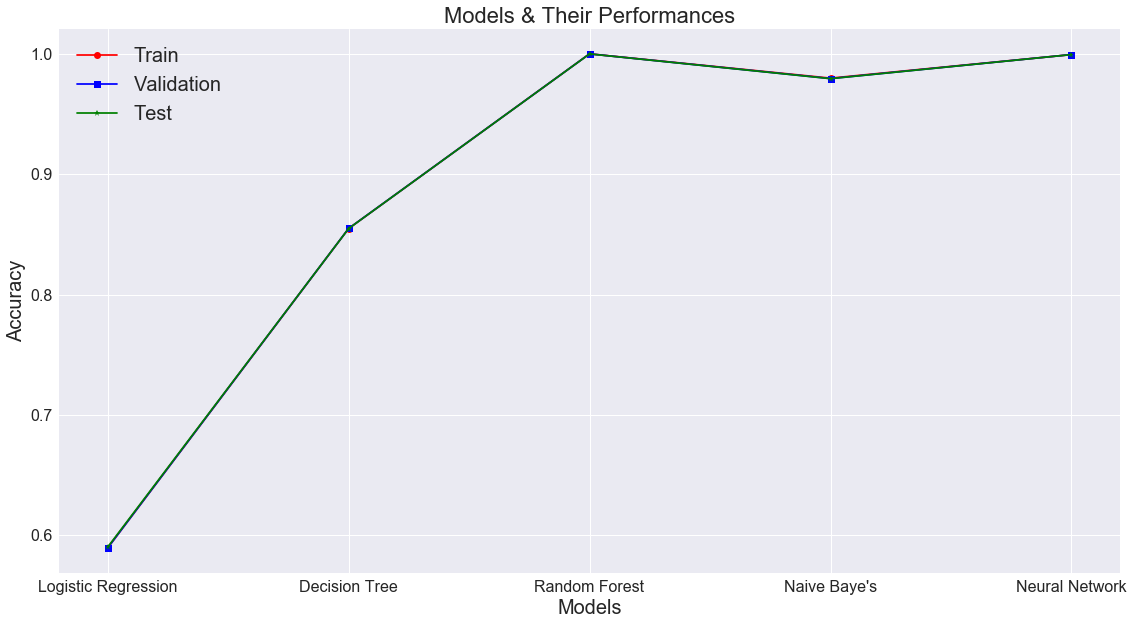

In [46]:
plt.figure(figsize = (19, 10))
plt.plot(model, trAcc, "o-", label = "Train", color = "red")
plt.plot(model, valAcc, "s-", label = "Validation", color = "blue")
plt.plot(model, tesAcc, "*-", label = "Test", color = "green")
plt.legend(fontsize=20)
plt.xlabel("Models", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Models & Their Performances", fontsize = 22)
plt.show()